<a href="https://colab.research.google.com/github/christopher-reed/tidytuesday/blob/master/2020/week_46/TidyTuesday_Phonelines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import packages and data

In [184]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import numpy as np

In [185]:
df_mobile = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-11-10/mobile.csv')
df_landline = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-11-10/landline.csv')

# Wrangle Data 🤠



*   Find # mobile subs per person for each country and year
*   Find the 5 countires that reached the "more mobile subs than people" benchmark the earliest. Repeat same for the latest.



In [186]:
# Mobile and telephone subscription value are per 100 people. We can find the # phone per person by dividing that value by 100
df_mobile['mobile_subs_per_person'] = df_mobile['mobile_subs'] / 100

# Find all the countries and years where there was more than one mobile sub per person
more_phones_than_people = df_mobile[df_mobile['mobile_subs_per_person'] > 1].sort_values(by = ['year'], ascending = False)

# Group by country and find the minimum year. Then sort by year to find the earliest and latest countires to break threshold
earliest_cross = more_phones_than_people.groupby('entity').min().reset_index().sort_values(by = 'year').head(3)
latest_cross = more_phones_than_people.groupby('entity').min().reset_index().sort_values(by = 'year').tail(3)

# List of earliest, latest, all all countries to plot
earliest_cross_countries = earliest_cross['entity'].to_list()
latest_cross_countries = latest_cross['entity'].to_list()

all_plot_countries = earliest_cross_countries + latest_cross_countries

# Filter mobile df to only select countries
df_mobile_plot = df_mobile[df_mobile['entity'].isin(all_plot_countries)]

# Plotting 📈

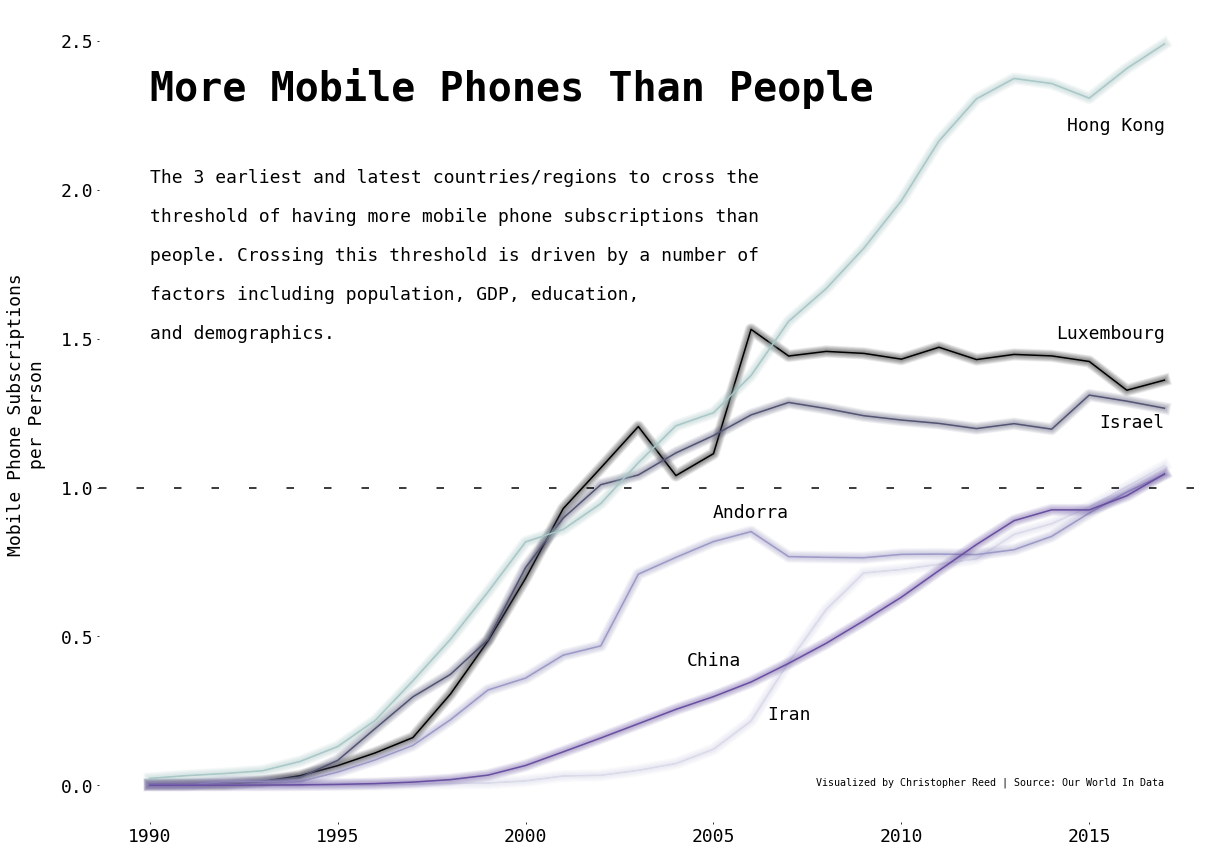

In [235]:
# Create figure and ax
fig, ax = plt.subplots(figsize = (20, 15))

#####################
##COLORS AND PARAMS##
#####################

# Neon effect fixed parameters
n_shades = 10
diff_linewidth = 1.05
alpha_value = 0.5 / n_shades

# Fast and slow color maps
fast_color=iter(cm.bone(np.linspace(0,0.75, len(earliest_cross_countries))))
slow_color = iter(cm.Purples(np.linspace(0.25,0.75, len(latest_cross_countries))))

############
##PLOTTING##
############

# Iterate through countries
for country in all_plot_countries:

  # Filter to country
  df_mobile_plot_filter = df_mobile_plot[df_mobile_plot['entity'] == country]

  # If early...
  if country in earliest_cross_countries:

    # Iter through fast cmap and plot
    c_fast = next(fast_color)
    ax.plot(df_mobile_plot_filter['year'], df_mobile_plot_filter['mobile_subs_per_person'], color = c_fast)

    # Neon effect
    for n in np.arange(1, n_shades + 1):
      ax.plot(df_mobile_plot_filter['year'], df_mobile_plot_filter['mobile_subs_per_person'],
              linewidth = 2 + (diff_linewidth*n),
              alpha = alpha_value,
              color = c_fast)

  # If slow...
  elif country in latest_cross_countries:

    # Iter through slow cmap and plot
    c_slow = next(slow_color)
    ax.plot(df_mobile_plot_filter['year'], df_mobile_plot_filter['mobile_subs_per_person'], color = c_slow)

    # Neon effect
    for n in np.arange(1, n_shades + 1):
      ax.plot(df_mobile_plot_filter['year'], df_mobile_plot_filter['mobile_subs_per_person'],
              linewidth = 2 + (diff_linewidth*n),
              alpha = alpha_value,
              color = c_slow)


# Horizontal line
ax.axhline(y = 1, ls = '--', dashes=(5, 20), color = 'black')


###############
##LINE LABELS##
###############
ax.text(2017, 2.2, 'Hong Kong', fontsize = 18, family = 'monospace', ha = 'right')
ax.text(2017, 1.5, 'Luxembourg', fontsize = 18, family = 'monospace', ha = 'right')
ax.text(2017, 1.2, 'Israel', fontsize = 18, family = 'monospace', ha = 'right')

ax.text(2006, 0.9, 'Andorra', fontsize = 18, family = 'monospace', ha = 'center')
ax.text(2005, 0.4, 'China', fontsize = 18, family = 'monospace', ha = 'center')
ax.text(2007, 0.22, 'Iran', fontsize = 18, family = 'monospace', ha = 'center')


##########################
##AXIS LABELS AND FORMAT##
##########################

ax.set_ylabel('Mobile Phone Subscriptions\nper Person', fontsize = 18, labelpad = 15, family = 'monospace')

# Change font of x and y tick labels
for label in ax.get_xticklabels() :
    label.set_fontproperties('monospace')

for label in ax.get_yticklabels() :
    label.set_fontproperties('monospace')

# Tick label size and length
ax.tick_params(axis = 'both', labelsize = 18, length = 2)

########
##TEXT##
########

title = 'More Mobile Phones Than People'
subtitle = """The 3 earliest and latest countries/regions to cross the
threshold of having more mobile phone subscriptions than 
people. Crossing this threshold is driven by a number of
factors including population, GDP, education,
and demographics.""" 

ax.text(1990, 2.3, title, fontsize = 40, family = 'monospace', weight = 'bold', ha = 'left')
ax.text(1990, 1.5, subtitle, fontsize = 18, family = 'monospace', ha = 'left', linespacing = 2.5)


###########
##SOURCES##
###########

ax.text(2017, 0, 'Visualized by Christopher Reed | Source: Our World In Data', ha = 'right', fontsize = 10, family = 'monospace')

###########
##DESPINE##
###########
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Save
plt.savefig('tidy_tuesday_phones.jpg', bbox_inches = 'tight')